In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import savgol_filter
import mat73 # for reading matlab files over v7.3
import numpy.linalg as linalg

def find_nearest(array, value):
    array = np.asarray(array)
    idx = np.abs(array - value).argmin()
    return idx

# plot and print the extinction ratio
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.25   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

import matplotlib
import matplotlib.font_manager
fpaths = matplotlib.font_manager.findSystemFonts()

# for i in fpaths:
#     f = matplotlib.font_manager.get_font(i)
#     print(f.family_name)

# change the default font
# matplotlib.rcParams['font.family'] = 'calibri'
# matplotlib.rcParams['font.family'] = 'DejaVu Sans' # default font
matplotlib.rcParams['font.family'] = 'calibri'
matplotlib.rcParams['font.weight'] = 'light' # set as Calibri Light

# Use Helvetica
# matplotlib.rcParams['font.family'] = 'Helvetica'

# Note this won't work on the labels, use the following for labels
font_cl = {'fontname': 'calibri', 'weight': 'light'}

# Figure predefines
fs_ticks = 22
fs_label = 24
fs_legend = 18
fs_title = 24
w_fig = 8
h_fig = 7

s_dot = 25

157079.63267948964


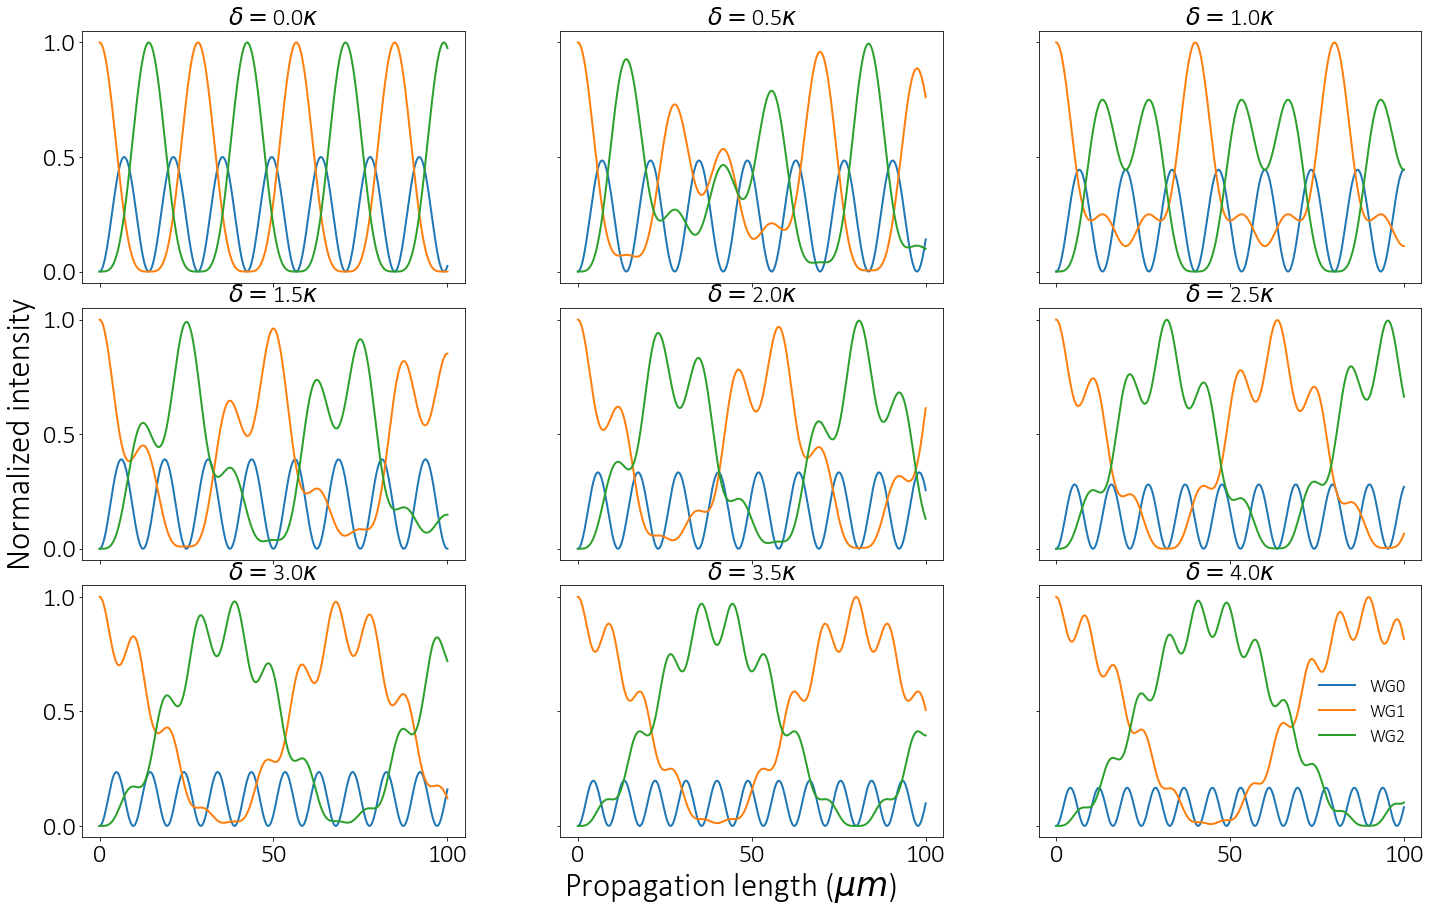

In [2]:
# Define delta and kappa, in our case, we use a kappa = 6E4 as a demonstration, 
# this value can be obtained through numerical simulation and coupled-mode theory: 
# kappa = pi/(2*Lc) for two phase-matched coupled waveguides.
# Use Lc = 10 um as an example
Lc = 10e-6
kappa = np.pi/(2 * Lc)
print(kappa)
# Detuning can be adjusted pretty flexibly
deltas = np.linspace(0*kappa, 4*kappa, 9)

# Input vector
E_in = np.array([0, 1, 0])
zs = np.linspace(0, 100e-6, 1000)
E_out = np.zeros((1000, 3), dtype=np.complex_)

fs_dc = 4
str_wg = ["WG0", "WG1", "WG2"]

fig, axs = plt.subplots(3, 3, sharex = True, sharey = True, figsize= (3*w_fig, 2*h_fig))
for i, delta in enumerate(deltas):
    row = int(i / 3)
    col = int(i % 3)
    # The characteristic matrix of the coupled three waveguide structure
    M_1 = np.array([[0, kappa, kappa], [kappa, -delta, 0], [kappa, 0, -delta]])
    eig_val, eig_vec = linalg.eig(M_1)
    
    # Take the inversion of the eigen_vectors and multiply it by the input vector
    eig_vec_inv = linalg.inv(eig_vec)

    # determine the input supermode amplitude
    amp_sm = eig_vec_inv @ E_in

    # experss the amplitude at each port and calculate for a distance of 100 um
    for i, z in enumerate(zs):
        M_3 = np.stack( (np.exp(1j*eig_val[0]*z) * eig_vec[:, 0], np.exp(1j*eig_val[1]*z) * eig_vec[:, 1], \
                         np.exp(1j*eig_val[2]*z) * eig_vec[:, 2]), axis = 1)
        E_out[i, :] = M_3 @ amp_sm
        
    # plot the result
    for j in range(3):
        axs[row, col].plot(zs * 1e6, np.abs(E_out[:, j])**2, linewidth=2, 
                           color='C{:d}'.format(j), label = str_wg[j])
    
    axs[row, col].tick_params(axis='x', labelsize=fs_ticks + fs_dc)
    axs[row, col].tick_params(axis='y', labelsize=fs_ticks + fs_dc)
    axs[row, col].set_title(r"$\delta=${:.1f}$\kappa$".format((delta/kappa)), fontsize=fs_title, **font_cl)
    
#     print(delta/kappa)
#     print("middle min:{:4.2f}, left min:{:4.2f}, right max:{:4.2f}".format(\
#             np.amin(np.abs(E_out[20:, 0])**2), np.amin(np.abs(E_out[:, 1])**2), np.amax(np.abs(E_out[:, 2])**2)))
#     print('*****************')
    
axs[2, 2].legend(loc="right", frameon=False, fontsize=fs_legend)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
fig.text(0.5, 0.05, r'Propagation length ($\mu m$)', fontsize=fs_label+fs_dc+5, ha='center', va='center')
fig.text(0.09, 0.5, 'Normalized intensity', fontsize=fs_label+fs_dc+5, ha='center', va='center', rotation='vertical')
fig.savefig("Three-waveguide numerical model.jpg", bbox_inches = 'tight', dpi = 300)